In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [6]:
(X_train, y_train),(X_test, y_test) = mnist.load_data('E:\\myproj\\mnist.npz')

11493376/11490434 [==============================] - 16s 1us/step


In [7]:
X_train.shape
X_test.shape


(10000, 28, 28)

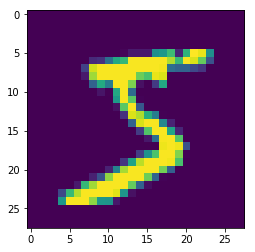

In [8]:
#Visualization
plt.imshow(X_train[0])

In [9]:
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)
X_train.shape
X_test.shape

(10000, 784)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [11]:
#One hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_train_cat.shape
y_test_cat.shape

In [28]:
#Clear the session in case of changing model and parameters
K.clear_session()

In [43]:
#Our neural network with 5 layers and represented amount of neurons
model = Sequential()
model.add(Dense(512,input_dim=28*28,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.compile(Adam(lr=0.005),
              loss='categorical_crossentropy',
             metrics=['accuracy'])

In [44]:
#training the data on our model
h = model.fit(X_train,y_train_cat,epochs=5,batch_size=128,verbose=2,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
 - 17s - loss: 0.2847 - acc: 0.9143 - val_loss: 0.1179 - val_acc: 0.9642
Epoch 2/5
 - 13s - loss: 0.1177 - acc: 0.9668 - val_loss: 0.1062 - val_acc: 0.9750
Epoch 3/5
 - 13s - loss: 0.0905 - acc: 0.9747 - val_loss: 0.0909 - val_acc: 0.9750
Epoch 4/5
 - 13s - loss: 0.0746 - acc: 0.9790 - val_loss: 0.0981 - val_acc: 0.9747
Epoch 5/5
 - 13s - loss: 0.0629 - acc: 0.9825 - val_loss: 0.1053 - val_acc: 0.9767


Text(0.5,0,'Epochs')

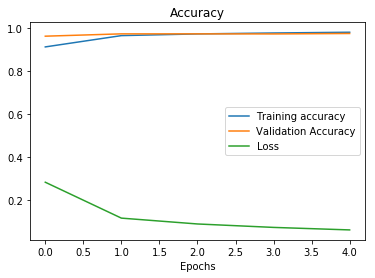

In [53]:
#Accuracy graph
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.plot(h.history['loss'])
plt.legend(['Training accuracy', 'Validation Accuracy','Loss'])
plt.title('Accuracy')
plt.xlabel('Epochs')


In [65]:
#Test Accuracy
test_accuracy = model.evaluate(X_test,y_test_cat)
test_accuracy

10000/10000 [==============================] - 1s 141us/step


[0.12521871876898222, 0.9715]

## Thank you